In [1]:
# import some libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# seaborn is a layer on top of matplotlib which has additional visualizations -
# just importing it changes the look of the standard matplotlib plots.
# the current version also shows some warnings which we'll disable.
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

# show plots inline
%matplotlib inline

In [2]:
# get data and show some records
data = pd.read_csv('C:/Users/Dell/Documents/iris.csv')
#data = data.drop('Id', axis=1) # get rid of the Id column - don't need it
data.sample(5)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
21,5.1,3.7,1.5,0.4,setosa
136,6.3,3.4,5.6,2.4,virginica
121,5.6,2.8,4.9,2.0,virginica
51,6.4,3.2,4.5,1.5,versicolor
1,4.9,3.0,1.4,0.2,setosa


In [3]:
# split data into features (X) and labels (y)
X = data.iloc[:,0:4]
y = data.iloc[:,-1]
print(X.sample(5))
print(y.sample(5))

     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
141           6.9          3.1           5.1          2.3
106           4.9          2.5           4.5          1.7
92            5.8          2.6           4.0          1.2
60            5.0          2.0           3.5          1.0
120           6.9          3.2           5.7          2.3
54     versicolor
65     versicolor
143     virginica
127     virginica
142     virginica
Name: Species, dtype: object


In [4]:
# see how many samples we have of each species 
data["Species"].value_counts()

versicolor    50
setosa        50
virginica     50
Name: Species, dtype: int64

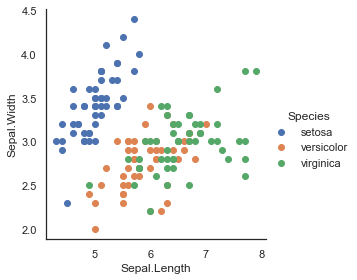

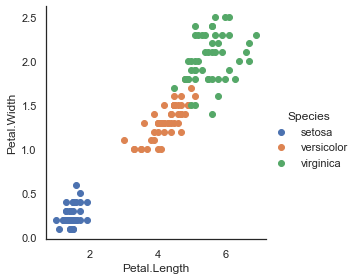

In [5]:
sns.FacetGrid(data, hue="Species", size=4).map(plt.scatter, "Sepal.Length", "Sepal.Width") .add_legend(); 
# do same for petals 
sns.FacetGrid(data, hue="Species", size=4).map(plt.scatter, "Petal.Length", "Petal.Width").add_legend(); 

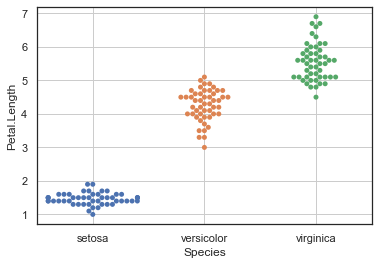

In [6]:
# show petal length distributions in a swarm plot - 
# just shows one dimension of the data, so not as useful as the previous plots
sns.swarmplot(x="Species", y="Petal.Length", data=data)
plt.grid()

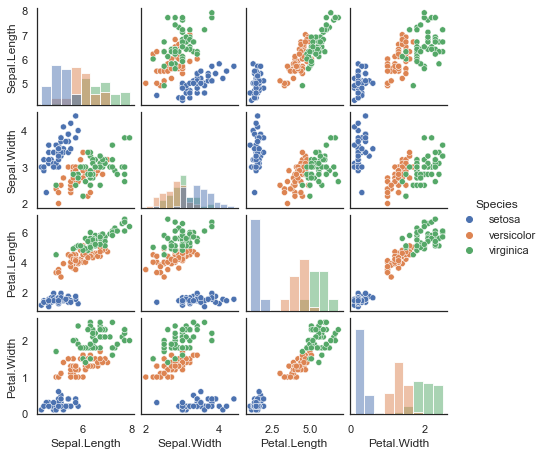

In [7]:
# note: the semicolon at the end just hides a line of text output.
sns.pairplot(data, hue="Species", diag_kind="hist", size=1.6)

In [8]:
# the data is unbalanced (eg sepallength ~4x petalwidth), so should do feature scaling,
# otherwise the larger features will dominate the others in clustering, etc.

from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

scaler.fit(X)
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)

X_scaled.sample(5)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
74,0.674501,-0.362176,0.308059,0.132510
106,-1.143017,-1.282963,0.421734,0.659038
123,0.553333,-0.822570,0.649083,0.790671
124,1.038005,0.558611,1.103783,1.185567
129,1.643844,-0.131979,1.160620,0.527406


In [9]:
from sklearn.cluster import KMeans

nclusters = 3 # this is the k in kmeans
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X_scaled)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(X_scaled)
y_cluster_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [10]:
from sklearn import metrics
score = metrics.silhouette_score(X_scaled, y_cluster_kmeans)
score

0.45994823920518646

<AxesSubplot:ylabel='Density'>

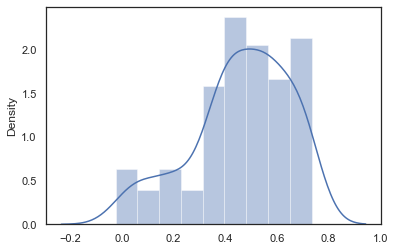

In [11]:
scores = metrics.silhouette_samples(X_scaled, y_cluster_kmeans)
sns.distplot(scores)

array([[<AxesSubplot:title={'center':'setosa'}>,
        <AxesSubplot:title={'center':'versicolor'}>],
       [<AxesSubplot:title={'center':'virginica'}>, <AxesSubplot:>]],
      dtype=object)

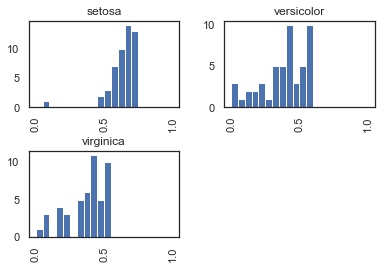

In [12]:
# can we add the species info to that plot?
# well, can plot them separately using pandas - 
df_scores = pd.DataFrame()
df_scores['SilhouetteScore'] = scores
df_scores['Species'] = data['Species']
df_scores.hist(by='Species', column='SilhouetteScore', range=(0,1.0), bins=20)

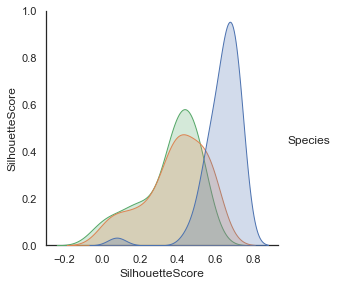

In [13]:
sns.pairplot(df_scores, hue="Species", size=4)

In [14]:
# mash the data down into 2 dimensions

from sklearn.decomposition import PCA

ndimensions = 2

pca = PCA(n_components=ndimensions, random_state=seed)
pca.fit(X_scaled)
X_pca_array = pca.transform(X_scaled)
X_pca = pd.DataFrame(X_pca_array, columns=['PC1','PC2']) # PC=principal component
X_pca.sample(5)

,PC1,PC2
37,-2.527332,0.592293
40,-2.286475,0.441715
127,1.020951,0.064346
143,2.040558,0.867521
35,-2.207809,-0.206107


In [15]:
y_id_array = pd.Categorical(data['Species']).codes

df_plot = X_pca.copy()
df_plot['ClusterKmeans'] = y_cluster_kmeans
df_plot['SpeciesId'] = y_id_array # also add actual labels so we can use it in later plots
df_plot.sample(5)

,PC1,PC2,ClusterKmeans,SpeciesId
95,0.091361,-0.181192,0,1
62,0.562108,-1.764724,0,1
139,1.852045,0.676128,2,2
119,1.263767,-1.706745,0,2
123,1.333232,-0.481811,0,2


In [19]:
def plotData(df, groupby):
    "make a scatterplot of the first two principal components of the data, colored by the groupby field"
    
    # make a figure with just one subplot.
    # you can specify multiple subplots in a figure, 
    # in which case ax would be an array of axes,
    # but in this case it'll just be a single axis object.
    fig, ax = plt.subplots(figsize = (7,7))

    # color map
    cmap = mpl.cm.get_cmap('prism')

   
    for i, cluster in df.groupby(groupby):
        cluster.plot(ax = ax, # need to pass this so all scatterplots are on same graph
                     kind = 'scatter', 
                     x = 'PC1', y = 'PC2',
                     color = cmap(i/(nclusters-1)), # cmap maps a number to a color
                     label = "%s %i" % (groupby, i), 
                     s=30) # dot size
    ax.grid()
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title("Principal Components Analysis (PCA) of Iris Dataset");

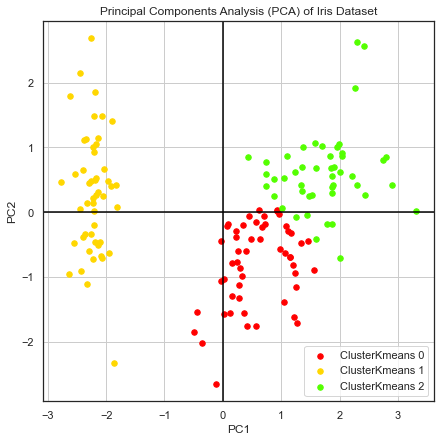

In [20]:
# plot the clusters each datapoint was assigned to
plotData(df_plot, 'ClusterKmeans')

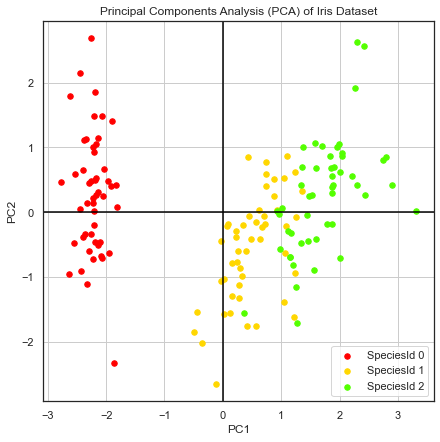

In [21]:
# so those are the *predicted* labels - what about the *actual* labels?
plotData(df_plot, 'SpeciesId')

In [22]:
# now let's try GMM clustering, which tries to fit normally-distributed clusters, 
# and might be the case when measuring things like petal and sepal sizes...

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=nclusters)
gmm.fit(X_scaled)

# predict the cluster for each data point
y_cluster_gmm = gmm.predict(X_scaled)
y_cluster_gmm

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

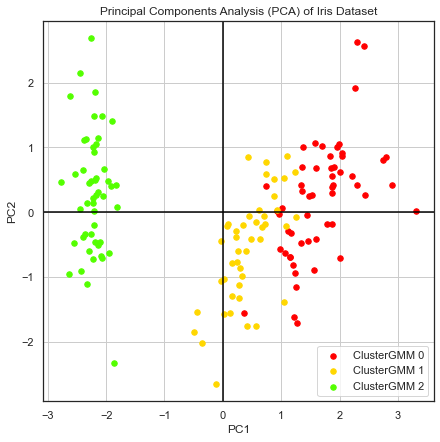

In [23]:
# add the GMM clusters to our data table and plot them
df_plot['ClusterGMM'] = y_cluster_gmm
plotData(df_plot, 'ClusterGMM')

In [24]:
# COMPARE K means and GMM clustering

from sklearn.metrics.cluster import adjusted_rand_score

# first let's see how the k-means clustering did - 
score = adjusted_rand_score(y, y_cluster_kmeans)
score

0.6201351808870379

In [25]:
# now the GMM clustering - 
score = adjusted_rand_score(y, y_cluster_gmm)
score

0.9038742317748124

In [26]:
# so the GMM clustering matched the true labels more closely than the Kmeans,
# as expected from the plots.